# Car Price Using Linear Regression

Nous souhaitons faire de la prédiction concernant les prix des voitures. Nous utiliserons un dataset mis à diposition dans Kaggle.

## Nous allons procéder comme suit : 
1. Import des librairies nécessaires
2. Nettoyage des données
3. Préprocessing
4. Modelisation
5. Evaluation
6. Analyse des résultats obtenus

### 1.Imports

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import metrics
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures,StandardScaler


from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [47]:
# Importer des données à partir d'un fichier CSV
chemin_fichier_csv = 'car_data.csv'
df = pd.read_csv(chemin_fichier_csv)
df.head(10)  # Affiche les premières lignes du DataFrame

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [48]:
df.tail(10) # Affiche les dernières lignes du DataFrame

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [49]:
df.shape

(301, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [51]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### 2. Nettoyage des données

Notre cible sur laquelle nous voulons faire des prédictions est la colonne **"Selling_Price"**.

Dans cette étape de l'étude, nous allons supprimer les colonnes qui nous seront pas utiles et ajouter la colonne calculée "Age" :

In [52]:
df.drop('Car_Name',axis=1,inplace=True)

In [53]:
maximum=df['Year'].max()
Age=df['Year'].apply(lambda x:(maximum+1)-x)
df.drop('Year',axis=1,inplace=True)
df.insert(0,'Age',Age);df

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


### 3. Préprocessing

Dans cette phase de pré-traitement, nous allons d'abord visualiser les prix des voitures en fonction de différentes variables: 

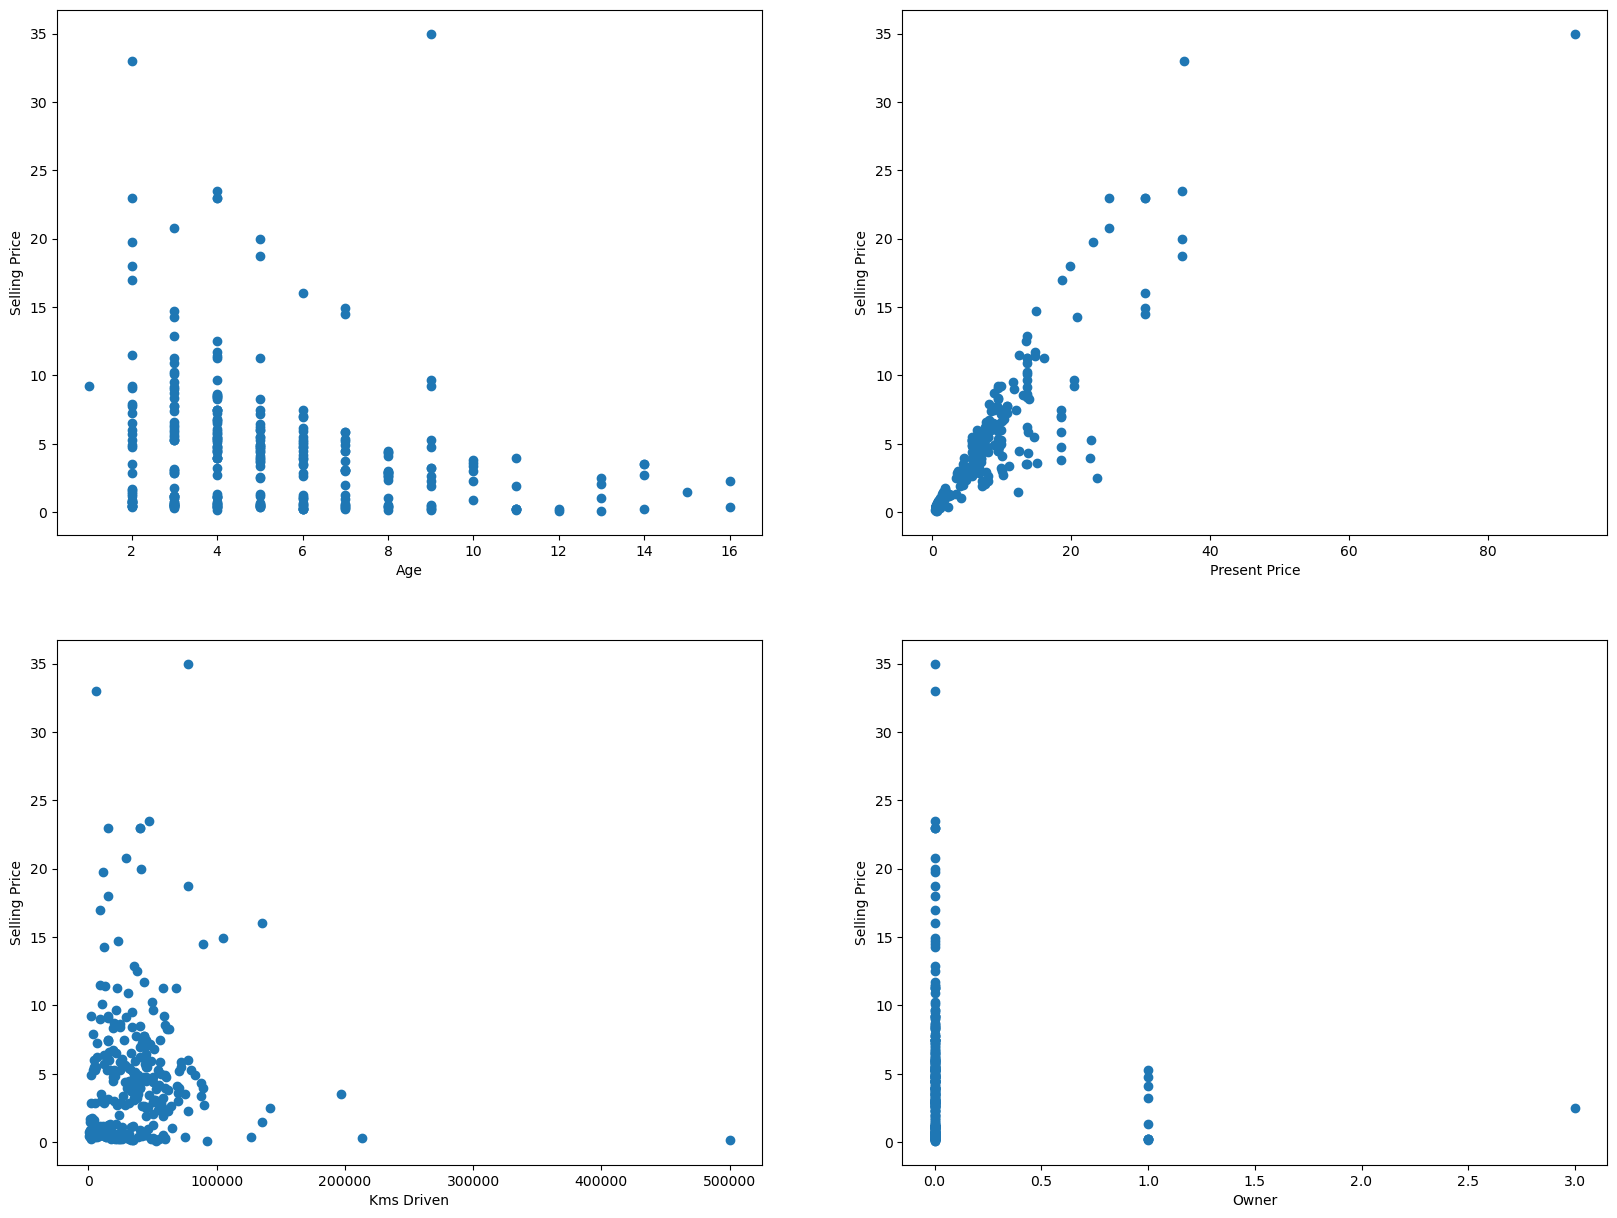

In [55]:
fig=plt.figure(figsize=(20,15))
fs=mpl.gridspec.GridSpec(2,2)

ax0 = fig.add_subplot(fs[0:1, 0:1])
ax0.scatter(df['Age'], df['Selling_Price'])
ax0.set_xlabel("Age")
ax0.set_ylabel("Selling Price")

ax1 = fig.add_subplot(fs[0:1, 1:])
ax1.scatter(df['Present_Price'], df['Selling_Price'])
ax1.set_xlabel("Present Price")
ax1.set_ylabel("Selling Price")

ax2 = fig.add_subplot(fs[1:2, 0:1])
ax2.scatter(df['Kms_Driven'], df['Selling_Price'])
ax2.set_xlabel("Kms Driven")
ax2.set_ylabel("Selling Price")

ax3 = fig.add_subplot(fs[1:2, 1:])
ax3.scatter(df['Owner'], df['Selling_Price'])
ax3.set_xlabel("Owner")
ax3.set_ylabel("Selling Price")

plt.show()

Nous pouvons observer les valeurs aberrantes dans les différents graphiques, nous allons donc les supprimer :

In [56]:
(df[(df['Present_Price']>80)])

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [57]:
(df[(df['Kms_Driven']>450000)])

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,11,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [59]:
df.drop(index=[86,196],inplace=True)